In [37]:
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import class_weight, shuffle
sns.set()

In [5]:
# D. Cashon
# Training set class distribution
data_path = Path('/mnt/disks/gscratch/train')

In [53]:
total_img = 0
classes = ['bike', 'bus', 'car', 'motor', 'person', 'rider','traffic light', 'traffic sign', 'train', 'truck']
count_array = np.zeros(10)
class_array = []
for i in range(13):
    # load
    temp_img = np.load(data_path / ('test_img_pixnum2000_' + str(i) + '.npy'))
    temp_labels = np.load(data_path / ('test_label_pixnum2000_' + str(i) + '.npy'))
    class_array.append(list(temp_labels))
    vals, counts = np.unique(temp_labels, return_counts=True)
    count_array[:len(counts)] += np.array(counts) 
    total_img += temp_img.shape[0]
print(total_img)
print(count_array)
print(len(class_array))
                       

138980
[  464.  1927. 93401.   301. 12910.   172.  4243. 20290.  2460.  2812.]
13


In [22]:
to_plot = dict(zip(classes, count_array))

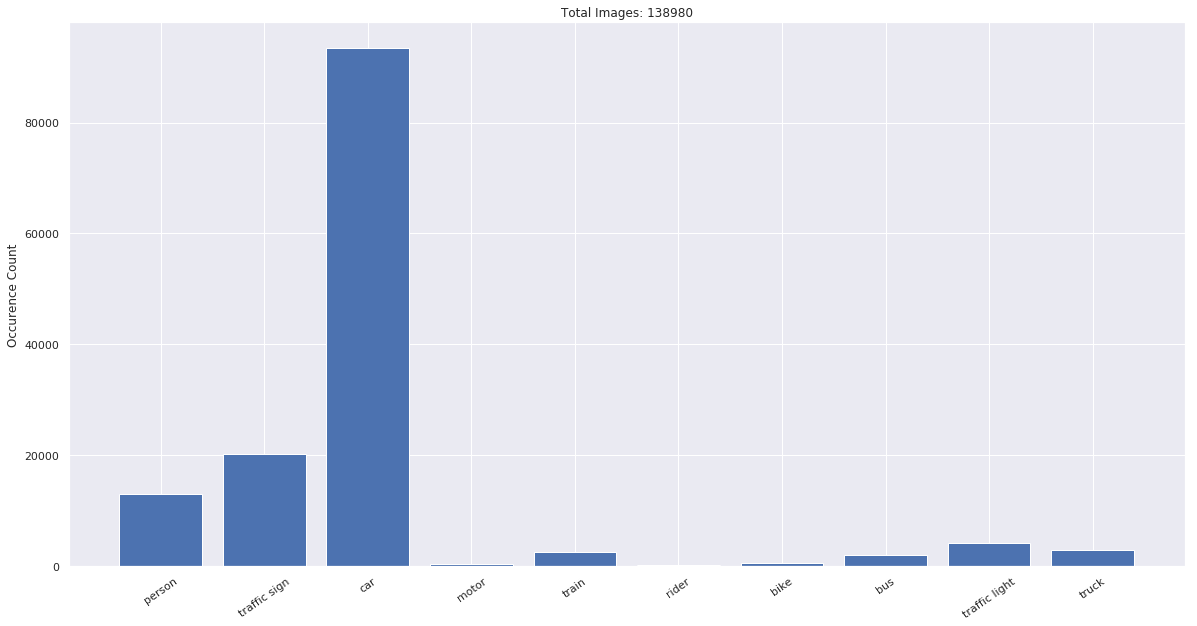

In [36]:
names = list(to_plot.keys())
values = list(to_plot.values())
plt.figure(figsize=(20,10))
#tick_label does the some work as plt.xticks()
plt.bar(range(len(to_plot)),values,tick_label=names)
#plt.savefig('bar.png')
plt.xticks(rotation='35')
plt.title('Total Images: 138980')
plt.ylabel('Occurence Count')
plt.show()

In [67]:
y1 = np.arange(10)
y1_tot = [item for sublist in class_array for item in sublist]

In [68]:
weights = class_weight.compute_class_weight('balanced',
                                                 y1,
                                                 y1_tot)

In [69]:
weights

array([2.99525862e+01, 7.21224702e+00, 1.48799263e-01, 4.61727575e+01,
       1.07652982e+00, 8.08023256e+01, 3.27551261e+00, 6.84967965e-01,
       1.98542857e+03, 2.63969611e+00])